In [1]:
import glob
import csv
import os
from tsne import bh_sne
import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.model_selection import StratifiedKFold                                                                                                                       
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.neighbors import KNeighborsClassifier

import numpy as np
from numpy.random import RandomState
np.random.seed(1)

In [2]:
flist = glob.glob("train/*.asm")

In [3]:
num_samples = len(flist)
print("Number of samples: %i" %(num_samples))

Number of samples: 10868


In [4]:
flist

['train/0mgFnqeLAMr7jthUYRTv.asm',
 'train/4EnNLux3rOG8i0W9DBVf.asm',
 'train/aBzIwsiXPGYFxKEgOu2q.asm',
 'train/grbAvIxKkFeLica6D2QJ.asm',
 'train/HaWuY5IXN7gOmJG4ZCkd.asm',
 'train/C0zcsP1IiGEXyLkx6bp2.asm',
 'train/IZeQVP4mMEwxvrzfUd6R.asm',
 'train/iwKlT6Fh3qfXp2kdVS7a.asm',
 'train/4syoiE9gr1HVtAfwTQY8.asm',
 'train/hTWBq5QXgOm0eKV9ktRu.asm',
 'train/9zbitD6NE10I4FjdgJvV.asm',
 'train/IpiH1PbUFYZwRWe2jl5t.asm',
 'train/JhBYHQsTMGWqaf24Ou0p.asm',
 'train/2UcBWPt6mf8dohDsYxOR.asm',
 'train/0uNkt6sirCnUWw175pjl.asm',
 'train/iks3Y5jQmILCpn8O6wR7.asm',
 'train/auQidPmlt1NneSZ7FRjs.asm',
 'train/3Isqvz4GW6LAxUaZP7f0.asm',
 'train/euLEGg3lHfAIJz9dvyqa.asm',
 'train/av7Nljxu5MQ3q1b9roUk.asm',
 'train/c7LBl4CN0AQdheFin9v8.asm',
 'train/7dNt3WEY0kxjshoeLAw5.asm',
 'train/GKdvW298FpuQAamNZlqn.asm',
 'train/hQ3EP5rHNeKgWXGIaZUC.asm',
 'train/gC6s297ohTDUNO3IzpKM.asm',
 'train/h2cdZou5ylgEQaUiJvSD.asm',
 'train/8Tvltu5MUWOfgNsSnKi3.asm',
 'train/1LE6uK9BdgNXIcSTnrMJ.asm',
 'train/hl6kTIUWGfd9

In [5]:
x86instructions = ['aaa','aad','aam','aas','adc','adcx','add','addpd','addps','addsd','addss','addsubpd','addsubps','adox','aesdec','aesdeclast','aesenc','aesenclast','aesimc','aeskeygenassist','and','andn','andnpd','andnps','andpd','andps','arpl','bextr','blendpd','blendps','blendvpd','blendvps','blsi','blsmsk','blsr','bound','bsf','bsr','bswap','bt','btc','btr','bts','bzhi','call','cbw','cdq','cdqe','clac','clc','cld','clflush','cli','clts','cmc','cmovcc','cmp','cmppd','cmpps','cmps','cmpsb','cmpsd','cmpsq','cmpss','cmpsw','cmpxchg','cmpxchg16b','cmpxchg8b','comisd','comiss','cpuid','cqo','crc32','cvtdq2pd','cvtdq2ps','cvtpd2dq','cvtpd2pi','cvtpd2ps','cvtpi2pd','cvtpi2ps','cvtps2dq','cvtps2pd','cvtps2pi','cvtsd2si','cvtsd2ss','cvtsi2sd','cvtsi2ss','cvtss2sd','cvtss2si','cvttpd2dq','cvttpd2pi','cvttps2dq','cvttps2pi','cvttsd2si','cvttss2si','cwd','cwde','daa','das','dec','div','divpd','divps','divsd','divss','dppd','dpps','emms','enter','extractps','f2xm1','fabs','fadd','faddp','fbld','fbstp','fchs','fclex','fcmovcc','fcom','fcomi','fcomip','fcomp','fcompp','fcos','fdecstp','fdiv','fdivp','fdivr','fdivrp','ffree','fiadd','ficom','ficomp','fidiv','fidivr','fild','fimul','fincstp','finit','fist','fistp','fisttp','fisub','fisubr','fld','fld1','fldcw','fldenv','fldl2e','fldl2t','fldlg2','fldln2','fldpi','fldz','fmul','fmulp','fnclex','fninit','fnop','fnsave','fnstcw','fnstenv','fnstsw','fpatan','fprem','fprem1','fptan','frndint','frstor','fsave','fscale','fsin','fsincos','fsqrt','fst','fstcw','fstenv','fstp','fstsw','fsub','fsubp','fsubr','fsubrp','ftst','fucom','fucomi','fucomip','fucomp','fucompp','fwait','fxam','fxch','fxrstor','fxsave','fxtract','fyl2x','fyl2xp1','haddpd','haddps','hlt','hsubpd','hsubps','idiv','imul','in','inc','ins','insb','insd','insertps','insw','int 3','int n','into','invd','invlpg','invpcid','iret','iretd','jmp','jcc','lahf','lar','lddqu','ldmxcsr','lds','lea','leave','les','lfence','lfs','lgdt','lgs','lidt','lldt','lmsw','lock','lods','lodsb','lodsd','lodsq','lodsw','loop','loopcc','lsl','lss','ltr','lzcnt','maskmovdqu','maskmovq','maxpd','maxps','maxsd','maxss','mfence','minpd','minps','minsd','minss','monitor','mov','movapd','movaps','movbe','movd','movddup','movdq2q','movdqa','movdqu','movhlps','movhpd','movhps','movlhps','movlpd','movlps','movmskpd','movmskps','movntdq','movntdqa','movnti','movntpd','movntps','movntq','movq','movq2dq','movs','movsb','movsd','movshdup','movsldup','movsq','movss','movsw','movsx','movsxd','movupd','movups','movzx','mpsadbw','mul','mulpd','mulps','mulsd','mulss','mulx','mwait','neg','nop','not','or','orpd','orps','out','outs','outsb','outsd','outsw','pabsb','pabsd','pabsw','packssdw','packsswb','packusdw','packuswb','paddb','paddd','paddq','paddsb','paddsw','paddusb','paddusw','paddw','palignr','pand','pandn','pause','pavgb','pavgw','pblendvb','pblendw','pclmulqdq','pcmpeqb','pcmpeqd','pcmpeqq','pcmpeqw','pcmpestri','pcmpestrm','pcmpgtb','pcmpgtd','pcmpgtq','pcmpgtw','pcmpistri','pcmpistrm','pdep','pext','pextrb','pextrd','pextrq','pextrw','phaddd','phaddsw','phaddw','phminposuw','phsubd','phsubsw','phsubw','pinsrb','pinsrd','pinsrq','pinsrw','pmaddubsw','pmaddwd','pmaxsb','pmaxsd','pmaxsw','pmaxub','pmaxud','pmaxuw','pminsb','pminsd','pminsw','pminub','pminud','pminuw','pmovmskb','pmovsx','pmovzx','pmuldq','pmulhrsw','pmulhuw','pmulhw','pmulld','pmullw','pmuludq','pop','popa','popad','popcnt','popf','popfd','popfq','por','prefetchw','prefetchwt1','prefetchh','psadbw','pshufb','pshufd','pshufhw','pshuflw','pshufw','psignb','psignd','psignw','pslld','pslldq','psllq','psllw','psrad','psraw','psrld','psrldq','psrlq','psrlw','psubb','psubd','psubq','psubsb','psubsw','psubusb','psubusw','psubw','ptest','punpckhbw','punpckhdq','punpckhqdq','punpckhwd','punpcklbw','punpckldq','punpcklqdq','punpcklwd','push','pusha','pushad','pushf','pushfd','pxor','rcl','rcpps','rcpss','rcr','rdfsbase','rdgsbase','rdmsr','rdpmc','rdrand','rdseed','rdtsc','rdtscp','rep','repe','repne','repnz','repz','ret','rol','ror','rorx','roundpd','roundps','roundsd','roundss','rsm','rsqrtps','rsqrtss','sahf','sal','sar','sarx','sbb','scas','scasb','scasd','scasw','setcc','sfence','sgdt','shl','shld','shlx','shr','shrd','shrx','shufpd','shufps','sidt','sldt','smsw','sqrtpd','sqrtps','sqrtsd','sqrtss','stac','stc','std','sti','stmxcsr','stos','stosb','stosd','stosq','stosw','str','sub','subpd','subps','subsd','subss','swapgs','syscall','sysenter','sysexit','sysret','test','tzcnt','ucomisd','ucomiss','ud2','unpckhpd','unpckhps','unpcklpd','unpcklps','vbroadcast','vcvtph2ps','vcvtps2ph','verr','verw','vextractf128','vextracti128','vfmadd132pd','vfmadd132ps','vfmadd132sd','vfmadd132ss','vfmadd213pd','vfmadd213ps','vfmadd213sd','vfmadd213ss','vfmadd231pd','vfmadd231ps','vfmadd231sd','vfmadd231ss','vfmaddsub132pd','vfmaddsub132ps','vfmaddsub213pd','vfmaddsub213ps','vfmaddsub231pd','vfmaddsub231ps','vfmsub132pd','vfmsub132ps','vfmsub132sd','vfmsub132ss','vfmsub213pd','vfmsub213ps','vfmsub213sd','vfmsub213ss','vfmsub231pd','vfmsub231ps','vfmsub231sd','vfmsub231ss','vfmsubadd132pd','vfmsubadd132ps','vfmsubadd213pd','vfmsubadd213ps','vfmsubadd231pd','vfmsubadd231ps','vfnmadd132pd','vfnmadd132ps','vfnmadd132sd','vfnmadd132ss','vfnmadd213pd','vfnmadd213ps','vfnmadd213sd','vfnmadd213ss','vfnmadd231pd','vfnmadd231ps','vfnmadd231sd','vfnmadd231ss','vfnmsub132pd','vfnmsub132ps','vfnmsub132sd','vfnmsub132ss','vfnmsub213pd','vfnmsub213ps','vfnmsub213sd','vfnmsub213ss','vfnmsub231pd','vfnmsub231ps','vfnmsub231sd','vfnmsub231ss','vgatherdpd','vgatherdps','vgatherqpd','vgatherqps','vinsertf128','vinserti128','vmaskmov','vpblendd','vpbroadcast','vperm2f128','vperm2i128','vpermd','vpermilpd','vpermilps','vpermpd','vpermps','vpermq','vpgatherdd','vpgatherdq','vpgatherqd','vpgatherqq','vpmaskmov','vpsllvd','vpsllvq','vpsravd','vpsrlvd','vpsrlvq','vtestpd','vtestps','vzeroall','vzeroupper','wait','wbinvd','wrfsbase','wrgsbase','wrmsr','xabort','xacquire','xadd','xbegin','xchg','xend','xgetbv','xlat','xlatb','xor','xorpd','xorps','xrelease','xrstor','xrstors','xsave','xsavec','xsaveopt','xsaves','xsetbv','xtest']

In [6]:
vectorizer = CountVectorizer(input='filename', stop_words=None, vocabulary=x86instructions, decode_error='ignore', min_df=1)

In [7]:
X = vectorizer.fit_transform(flist)

In [8]:
X = X.todense()

In [9]:
X

matrix([[0, 1, 2, ..., 0, 0, 0],
        [1, 1, 1, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ..., 
        [1, 0, 1, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]])

In [10]:
X.shape

(10868, 657)

In [11]:
file1gram = "Microsoft-opcode1gram.npy"
np.save(file1gram,X)

In [12]:
transformer = TfidfTransformer(smooth_idf=True)

In [13]:
tfidf = transformer.fit_transform(X)

In [14]:
tfidf = tfidf.todense()

In [15]:
tfidf

matrix([[ 0.        ,  0.00112053,  0.00208445, ...,  0.        ,
          0.        ,  0.        ],
        [ 0.00120036,  0.0012344 ,  0.00114815, ...,  0.        ,
          0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        ..., 
        [ 0.00109534,  0.        ,  0.00104769, ...,  0.        ,
          0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ]])

In [16]:
tfidf.shape

(10868, 657)

In [17]:
file1gramtfidf = "Microsoft-opcode1gram-tfidf.npy"
np.save(file1gramtfidf,tfidf)

In [18]:
trainLabelFile = "trainLabels.csv"

In [19]:
with open(trainLabelFile) as f:
    labelDict = dict(filter(None, csv.reader(f)))

In [20]:
labelDict

{'iBhngrmHEGAuytQvfDeW': '2',
 'Bf0LG2a8MqCtp3evSrPX': '3',
 '2TtDCQBqdnV314lNMxSk': '3',
 'Cg8vhSQsrO2Nw6tWAUji': '6',
 'imuPgZwAXOCS7k6DnNyH': '3',
 'b8iEJXSAgTHn7tcwzFyo': '2',
 'da3XhOZzQEbKVtLgMYWv': '1',
 'dkbDnlI7TqHBpteJx60c': '1',
 'gTcyJ45Wb3CRzmEqZKse': '3',
 'hHMbnm8juIizgTR7LAWC': '9',
 '4pd6mnJHiweUgAIjNubQ': '1',
 '0XnPCouGZdhIKliOFQHr': '8',
 '250wWOtELFspbVRJAaNn': '8',
 'auQidPmlt1NneSZ7FRjs': '6',
 '5dNsph6uJltkZMLzTP0w': '2',
 '8LiHPj7EOaFpnN0uTAW9': '1',
 '1zVtBw2rdTN9j7a4xZE0': '8',
 '6FPdv92ayjKlUWbLmXS3': '3',
 'c35p2bKLvCUAko96VwdI': '3',
 '32kdRqV7gDCjrpW1L4xS': '2',
 'J3VovZ7rDnIsYpk8UcXt': '2',
 '830VZXwLBxUc9qAeKMh4': '3',
 '3zDwi1mVHFahA62IUpOj': '2',
 '5AsUO9gZ8KxIycz6Tmr3': '2',
 'EatXZFY1SyHpxTDVg5nv': '9',
 'H8S3MwPF1hnIfqBWZzmc': '2',
 'goVvB4mFfTO9HKbtp3C6': '1',
 '3kKFSINOJQtmcxXyq6LR': '1',
 'gieTJZzmLhfO82bXVxkD': '2',
 'gmKLiC1aN48zVTEcvbeY': '1',
 'E1ALI9eYXgG2Nk0HOoby': '1',
 'jnhylIW4dLfewzYmEDOa': '3',
 'idINaACF1etphXJy3nSr': '2',
 '129LWuNO

In [21]:
y = np.zeros(num_samples)
pos = 0
for f in flist:
    fname = os.path.splitext(os.path.basename(f))[0]
    print("File: %s - Class: %s" %(fname,labelDict[fname]))
    y[pos] = int(labelDict[fname])
    pos += 1

File: 0mgFnqeLAMr7jthUYRTv - Class: 8
File: 4EnNLux3rOG8i0W9DBVf - Class: 8
File: aBzIwsiXPGYFxKEgOu2q - Class: 3
File: grbAvIxKkFeLica6D2QJ - Class: 3
File: HaWuY5IXN7gOmJG4ZCkd - Class: 2
File: C0zcsP1IiGEXyLkx6bp2 - Class: 3
File: IZeQVP4mMEwxvrzfUd6R - Class: 8
File: iwKlT6Fh3qfXp2kdVS7a - Class: 2
File: 4syoiE9gr1HVtAfwTQY8 - Class: 3
File: hTWBq5QXgOm0eKV9ktRu - Class: 2
File: 9zbitD6NE10I4FjdgJvV - Class: 3
File: IpiH1PbUFYZwRWe2jl5t - Class: 2
File: JhBYHQsTMGWqaf24Ou0p - Class: 2
File: 2UcBWPt6mf8dohDsYxOR - Class: 2
File: 0uNkt6sirCnUWw175pjl - Class: 1
File: iks3Y5jQmILCpn8O6wR7 - Class: 3
File: auQidPmlt1NneSZ7FRjs - Class: 6
File: 3Isqvz4GW6LAxUaZP7f0 - Class: 2
File: euLEGg3lHfAIJz9dvyqa - Class: 6
File: av7Nljxu5MQ3q1b9roUk - Class: 2
File: c7LBl4CN0AQdheFin9v8 - Class: 3
File: 7dNt3WEY0kxjshoeLAw5 - Class: 6
File: GKdvW298FpuQAamNZlqn - Class: 2
File: hQ3EP5rHNeKgWXGIaZUC - Class: 3
File: gC6s297ohTDUNO3IzpKM - Class: 3
File: h2cdZou5ylgEQaUiJvSD - Class: 3
File: 8Tvltu

File: 1VWsRMXwKY6LgUkZnxpo - Class: 2
File: CjpAVLr2c0Y3IPZtB8o6 - Class: 9
File: dBGtYCewZ8IpWsUmyNQV - Class: 7
File: 9CzLKlOgPSt6voDTQu8q - Class: 3
File: h5uGZKiToFpXSrkcARlB - Class: 3
File: i824AGVjzInbOBgtHZeQ - Class: 3
File: 3rLyNxUDWnemRoBSigOv - Class: 3
File: HAI3gUuLk0jmQwtZ5GOo - Class: 3
File: 6Ms2ERg7o8SHDhbN940U - Class: 9
File: DKs0lpax9nB8gS3XRuEb - Class: 7
File: ARaMSnYZ0XzjUg8swodL - Class: 3
File: cKkbQLrgITO1qjEHMDGY - Class: 3
File: 1QHbFGR3qcur6aWZw0Jk - Class: 3
File: KCxI1ZA3oiEqc8Xe4MkO - Class: 7
File: HVvNI0y1LSJ2OpPkFjqY - Class: 2
File: 9xTAMrBbq2ugRtDJ3lGU - Class: 2
File: db03PLecsviEz6TMZCSn - Class: 9
File: 47cdjy1YmUt5nwesX0qS - Class: 3
File: 3ESs1rk0uyp9wlGgFaKj - Class: 9
File: 9pVfLJrSuU8iANWPFM15 - Class: 3
File: kaC12G6AcH0KgrRY74O5 - Class: 2
File: d8xwlCsZztFpTnjSRWf3 - Class: 3
File: 7tDpNPXUISleJCkZQjr9 - Class: 8
File: dwBCl7xMSWvqFiZcJ1am - Class: 9
File: 7WkHb3TOoJ4XRYnBltNS - Class: 3
File: 4AlXcLmdg8JIsuxta617 - Class: 6
File: GComZn

File: jnP3ldrIwpWfEg8ODV9K - Class: 3
File: 3PmaDdlEYWrhG6e480xp - Class: 3
File: fDVZY1Wms3GePEk98Uir - Class: 3
File: FGPHc0QSsMmYUfraOil2 - Class: 8
File: 0SaYqdFRA5G7rfktjT63 - Class: 8
File: glvVJTocrt1M7ZpKI8ju - Class: 9
File: FV7sawPxCOQ9Y8jMAGir - Class: 3
File: 7nL2QiAIcsRxfMHwyTeB - Class: 3
File: 7dYo5p6fSV0rkgqLvzbT - Class: 2
File: I3QveCRHion2FwyzaUb0 - Class: 2
File: FsQeNCSYAb9jIP7DOByz - Class: 3
File: ira26FLCvbOlw4jy1mB0 - Class: 3
File: 9gpKWS6osX5Fq8E4UCLr - Class: 8
File: DbXC70pd6wiYxQMcBGkW - Class: 2
File: G2wSKbvoJjNBW0kuRihr - Class: 3
File: 2xmv5zSqBlakorbUw9MJ - Class: 3
File: HCGEdW14Kze8xNpaPXqU - Class: 9
File: f9E4HBYXeghm8ViJaKbr - Class: 2
File: dsqwmviX4YOERWu59MJ2 - Class: 6
File: d5GCPxQuly4m6hEn0gqk - Class: 8
File: 8JdntIrPBj61FRx39cfb - Class: 4
File: 0H63jydvIahOVqgx5Kfo - Class: 1
File: EZ7FwiO2p4DCrH6SJYBT - Class: 7
File: 5f3IdiCKy4wNjeoLptzF - Class: 3
File: H1CXVrKs0RnkxSFzOjIp - Class: 8
File: KawMHneL7VYj8oQ4m1cZ - Class: 2
File: 8WOdj5

File: 6SZ94ihjlB1O7IpvYLzn - Class: 3
File: C3ZfGBVmThlcWFQDEMvw - Class: 9
File: GN8ZQjzWfKBYUtH1ehM0 - Class: 7
File: e3oFfwX7HCTlgydL2cD8 - Class: 3
File: 6ZdpisIvCL1GornaSU4D - Class: 9
File: aRSepuWwyvZLgfXx8m9E - Class: 4
File: k2uRGpoUItiWrTga9ysQ - Class: 4
File: GPw0fzITLhcQDkSWdyYx - Class: 2
File: 02IOCvYEy8mjiuAQHax3 - Class: 6
File: 2fBiOgkxcmrHRInXwVWP - Class: 3
File: 8RtzYSqgoln09Z2LAmHK - Class: 3
File: GkMBlvTidr5oyYOVJCwc - Class: 5
File: blw8c7vA4pDdrTk3Zn0H - Class: 3
File: k19jiUAosZqJMnveuxt2 - Class: 3
File: egUM629t8ACVhj3Bp5rR - Class: 2
File: fQ5YydnBoJM7gmr19AIH - Class: 2
File: GBNdXiuAb7CrO5vVoK9I - Class: 3
File: iqIar6PNOtQDBcZV41u8 - Class: 3
File: 5su2fIARtLqUzSdQgDB9 - Class: 9
File: 9i7HAYD15sblakCpmF4V - Class: 2
File: 4eC9LmdHc6pRoP8BtTGv - Class: 3
File: iIZJnOKvCosaLkdjzVuc - Class: 8
File: cQUBNJXtAuLKlFf398Co - Class: 6
File: 1VDamNFKYErzIjbfxRh2 - Class: 3
File: gDsZ7RCYM6vW0VT9ENzl - Class: 7
File: 29WyrbfmNGFBVLoQhg8q - Class: 8
File: 8rGXqC

File: dHsIFJomVwubBQYCp0K4 - Class: 6
File: 7qgZAJlOevNdjHtbpfuR - Class: 3
File: H95ZaEcvWw78QnqDJb6l - Class: 2
File: cAmPglvzOGuwNCYo7Ihf - Class: 2
File: iOUrldKIZhAHmk6PF1b3 - Class: 2
File: GTyr8o3mQDug7cb0eCMz - Class: 2
File: GHyIqK3kbD7SvBftzaYo - Class: 4
File: j9H8dMDniJ1ptlAr4xTL - Class: 1
File: JjchSfDB7CA4N925O8UY - Class: 1
File: E9zHekMCv1oTD6yjrI3W - Class: 1
File: 36zPKsYmJc8wOiEqStFN - Class: 2
File: FmLkTo9MiyNfSdH5el2Q - Class: 1
File: FNMnqPH6hzyY8ZDX7SVj - Class: 2
File: H6pGwSYfNmZVd80aeWg3 - Class: 3
File: JZX2B0zdS7MAVmjLUkx6 - Class: 9
File: 9lHyVeXERtIaZcL4kWqM - Class: 4
File: 1aDvVlWtPApk6EuKLdCG - Class: 6
File: b2taq4gHVORCYDoixMB3 - Class: 9
File: 1hToAGU8YgHQxfVONLqJ - Class: 3
File: fZKYVSJadnFIhu5TC4Dm - Class: 8
File: 2qTFb1xySrO5Z0UBlhRi - Class: 1
File: 4sfNor501UBlmibpZGSX - Class: 8
File: ESWN3jbO4QaLp2HDuIzg - Class: 1
File: FrVgycGXPJC4mMvfe56i - Class: 2
File: 86QrjZewznD2W3VhpRbm - Class: 2
File: dHpIeYK9gkS3DWE8ziBU - Class: 2
File: IrptWD

File: hW0uMVwbTdslPIxXZCvr - Class: 1
File: aDUp8xVivPGtIEojsT7C - Class: 1
File: juBfkEG36LCnM41bOwKl - Class: 8
File: hDxgImyk6HKLi0YuaZ29 - Class: 3
File: 50iq3CaS7H1PDWetAMLR - Class: 3
File: 9y5xfjXiMHrCw3YTJzgL - Class: 3
File: j7UqgpTCiRr1s6kWHvKB - Class: 3
File: CPsXYMZcng0i9521IJVa - Class: 2
File: Dp9YGPB7ugsW8TF10Cba - Class: 3
File: 7hm0veuHiBCFWcEMPaND - Class: 2
File: cWho0OsVSbntY3fx1Rd4 - Class: 8
File: egZPafzVDuMYW0oGTRkr - Class: 2
File: JaO8p2qFXjiNARcbIvGH - Class: 3
File: 4KAfN3s7MPajdn5ecCIG - Class: 9
File: 9f0vLRPdeQOU6V8Dgs3k - Class: 2
File: i7OuEoAMRfXK6FW02vkr - Class: 3
File: CdbgJo8peBERKZNyQTYF - Class: 1
File: kl6Lw0U7WYT2biJXhP3y - Class: 4
File: 7tTN1k68jFBqlbXDixru - Class: 8
File: bwRF4icVxTHzGnUKvu2s - Class: 9
File: HfMdBXIbuSaZxGT5W4h1 - Class: 8
File: CezT83xEW279v4DBZUjN - Class: 3
File: IrmlDPzxU72SNhFbWjB8 - Class: 3
File: Ek1sLKWN2DoUFriJy7mC - Class: 8
File: EB0d2fJGLHam1tQCUDWu - Class: 5
File: 5tgsDzdZ9xMm8F47WNrv - Class: 1
File: FWLJQb

File: C7Kn4Pc3blWQFN5EdJfi - Class: 1
File: GsAVzyD4hUnebMNvJFxc - Class: 4
File: dg1AyKiHqjFwVOln4sLa - Class: 8
File: j0pIG349TtMiXgkH2bnF - Class: 9
File: Iec3SYD4Gimhob1xQ7sV - Class: 8
File: fbvWPV2U0xQ3TpqohAFy - Class: 4
File: dI1vM43Nq9uSAlZYCoV2 - Class: 6
File: cUIv9fk2DdxBPrCZqVzH - Class: 1
File: 2mxzRY0nGXtkb45lDrqC - Class: 3
File: 8VU3wPKq2lBY5bvnHQMS - Class: 2
File: 05EeG39MTRrI6VY21DPd - Class: 1
File: 2hbQu5mW4CPsyTgieHOr - Class: 3
File: JIy6ZgaGtHBAmv2krdKx - Class: 8
File: 4bdlcsiDkvA3hZC0XLQI - Class: 3
File: JZyx7pL2ueEr1Nwlj8aD - Class: 3
File: 0sMxy5SNLu1YCkKJzaB3 - Class: 2
File: HY9OPXg8TMBCzqemENGc - Class: 2
File: CoQn9bfkvMUjWwVgPAFL - Class: 3
File: gUqCe4oh1H7M5Y9EJQSs - Class: 8
File: 891Ymzl3VvoJLAMXh4pO - Class: 2
File: JVYGACXbeMWgP9hHsocD - Class: 3
File: CqQlP6D9YapR71wb2d48 - Class: 3
File: 7TkKqyHUA6vCitwdIOLW - Class: 2
File: 2EQ7bhH8pDCsW45djNeR - Class: 3
File: cFa4U6xqeVW7liJzMQk0 - Class: 9
File: JcQfYTkKWO0Cs5aqDzwb - Class: 2
File: an85Um

File: geWrd0Rkc2AsuVBJESwi - Class: 6
File: 5PZYiLlxFp6Kgsev0zaI - Class: 3
File: cOpJEz3VFlqX7dZDxUYn - Class: 2
File: 1xX6oSqvPDVs0AdlI3iB - Class: 2
File: hNjQviUSpfFb3anIL0mO - Class: 2
File: 0UTxRyirCXl6tsSE5GAv - Class: 3
File: i9IUuFXp4GLzKxO1V0NB - Class: 3
File: fiXI4tZdP6M2gKW0L1bj - Class: 8
File: E3TqRaCWmuPFyUg82eSD - Class: 9
File: dVDRPJcvx0lhzqHUtFKr - Class: 2
File: AHIPR4avZlJ9GiXsD3Wf - Class: 3
File: 7j2o04UxtlpFuTPrHXLa - Class: 6
File: bQepsKFSzxt8Pfk6qGaZ - Class: 2
File: I0wz6TmBL92MSGgxUboV - Class: 9
File: 2bdnyMU3XQlIA5grPeZm - Class: 1
File: I3hyQOBZM0Kxpmj6a74D - Class: 3
File: gJspjOHk7zXSGMB2Y5Tm - Class: 9
File: 0B2RwKm6dq9fjUWDNIOa - Class: 9
File: HkL72qMuOcp0T3gWahnN - Class: 2
File: BEcVolryIXTuDYLKbgGj - Class: 6
File: jwG7iS2FOyNaUY01QC5x - Class: 6
File: cOKeokjEfm24N0u3wh19 - Class: 8
File: cZJAl4tyThQ59MFEsvnR - Class: 3
File: f4FGZxJb07UsA1LvYpew - Class: 3
File: aFshyjLKu86f0ptlQnzk - Class: 3
File: 2riyIFwQHLl3GnakxJEj - Class: 1
File: JwsCip

File: FLjUoM3ahgeXQuRmAS8O - Class: 4
File: b3XoLNJOsUlrzcStWxjF - Class: 1
File: 6WauKLy80DTdQf5hjZx7 - Class: 2
File: I0aTJkCwgMY8P6h9vWSt - Class: 9
File: 6qwhD5Z3bsdFkyAzgxQ0 - Class: 3
File: A1SiGLNa86IsOJbXz3K2 - Class: 9
File: 27wyEMFY6QlxGfzpZ3iq - Class: 1
File: iuyCt7MlKpBzRVrwveNq - Class: 8
File: G3td1uFSQnHxrZ9jPE4X - Class: 2
File: gCVdj7N0JfPO2Yuh9Xp4 - Class: 8
File: I6pNbzORLrq8uG0cCJPi - Class: 7
File: iveb4LBTZR0ofd7SqVlP - Class: 9
File: 2037kCYJ5fZKPw4oDGX1 - Class: 1
File: KC4y0GNUxi6AvuRpQwsj - Class: 6
File: 6iwXrYeB4ZSlWy5Tj98L - Class: 2
File: BN76utiov1bnXza58ZTJ - Class: 3
File: cwQYBjsoDvAz5MNK8nCR - Class: 1
File: FVmO980BKzIHYiGUscDx - Class: 1
File: 1HRWOczEX65rYmMiZ2lv - Class: 1
File: 2q4R1FecArLBQfzSw9H7 - Class: 3
File: ifUj19ONxy3D72bKTWzY - Class: 8
File: Ar3u7TDqkySJ4KjhWXge - Class: 3
File: eYwtJkx9a6dBz7ChZb43 - Class: 8


In [22]:
y

array([ 8.,  8.,  3., ...,  8.,  3.,  8.])

In [23]:
y.shape

(10868,)

In [24]:
uniques, no_imgs = np.unique(y, return_counts=True)
no_imgs

array([1541, 2478, 2942,  475,   42,  751,  398, 1228, 1013])

In [25]:
list_fams = ['Ramnit','Lollipop','Kelihos_ver3','Vundo','Simda','Tracur','Kelihos_ver1','Obfuscator.ACY','Gatak']

In [26]:
print("Running t-SNE ...")
vis_data = bh_sne(np.float64(X), d=2, perplexity=30., theta=0.5, random_state=RandomState(1))

Running t-SNE ...


Plotting t-SNE ...


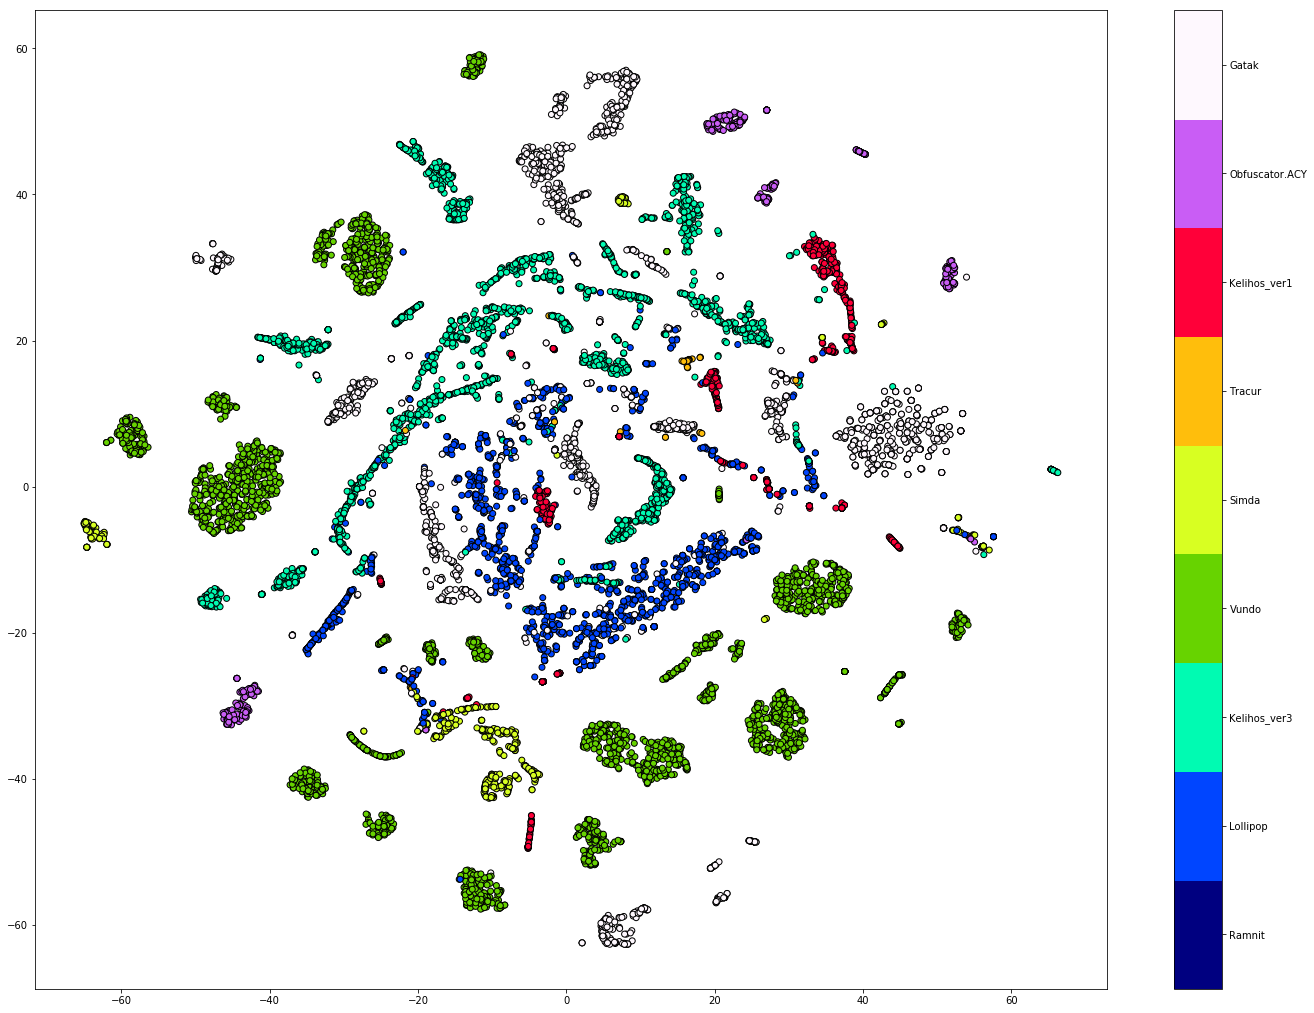

In [27]:
print("Plotting t-SNE ...")
figure = plt.gcf()
figure.set_size_inches(24, 18)
plt.scatter(vis_data[:, 0], vis_data[:, 1], c=y, cmap=plt.cm.get_cmap("gist_ncar", len(list_fams)),edgecolors="black")
plt.clim(-0.5, len(list_fams)-0.5)
cbar = plt.colorbar(ticks=range(len(list_fams)))
cbar.ax.set_yticklabels(list_fams)                     
plt.show()

In [28]:
# Create stratified k-fold subsets                                                                                                                                        
kfold = 10  # no. of folds                                                                 
skf = StratifiedKFold(kfold, shuffle=True,random_state=1)
skfind = [None] * kfold  # skfind[i][0] -> train indices, skfind[i][1] -> test indices
cnt = 0                                              
for index in skf.split(X, y):         
    skfind[cnt] = index                                                 
    cnt += 1 

In [29]:
# Training top_model and saving min training loss weights
n_neighbors = 1
conf_mat = np.zeros((len(list_fams),len(list_fams))) # Initializing the Confusion Matrix
for i in range(kfold):
    train_indices = skfind[i][0]
    test_indices = skfind[i][1]
    X_train = X[train_indices]
    y_train = y[train_indices]
    X_test = X[test_indices]
    y_test = y[test_indices]
    
    top_model = KNeighborsClassifier(n_neighbors, weights='distance',n_jobs=-1)
    top_model.fit(X_train,y_train)  # Training
    y_pred = top_model.predict(X_test)  # Testing
    print("[%d] Test acurracy: %.4f" %(i,accuracy_score(y_test,y_pred)))
    cm = confusion_matrix(y_test,y_pred)  # Compute confusion matrix for this fold
    conf_mat = conf_mat + cm  # Compute global confusion matrix

[0] Test acurracy: 0.9799
[1] Test acurracy: 0.9798
[2] Test acurracy: 0.9779
[3] Test acurracy: 0.9834
[4] Test acurracy: 0.9834
[5] Test acurracy: 0.9751
[6] Test acurracy: 0.9770
[7] Test acurracy: 0.9825
[8] Test acurracy: 0.9797
[9] Test acurracy: 0.9788


In [30]:
# Computing the average accuracy
avg_acc = np.trace(conf_mat)/sum(no_imgs)
print("Average acurracy: %.4f" %(avg_acc))

Average acurracy: 0.9798


In [31]:
# Viewing the confusion matrix
conf_mat = conf_mat.T  # since rows and cols are interchangeable
conf_mat_norm = conf_mat/no_imgs  # Normalizing the confusion matrix

Plotting the confusion matrix


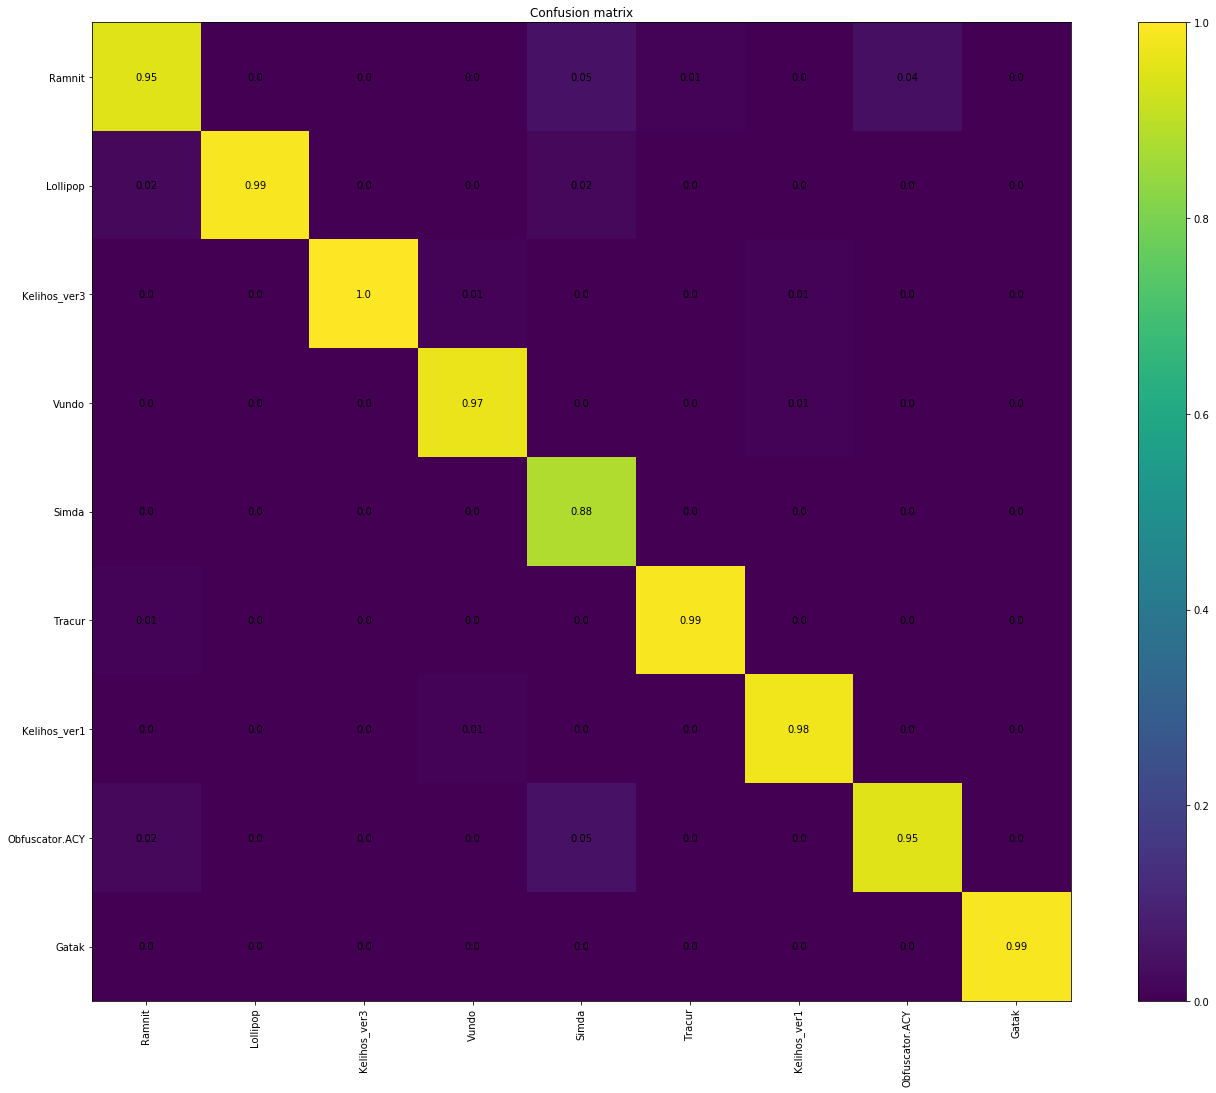

In [32]:
print("Plotting the confusion matrix")
conf_mat = np.around(conf_mat_norm,decimals=2)  # rounding to display in figure
figure = plt.gcf()
figure.set_size_inches(24, 18)
plt.imshow(conf_mat,interpolation='nearest')
for row in range(len(list_fams)):
    for col in range(len(list_fams)):
        plt.annotate(str(conf_mat[row][col]),xy=(col,row),ha='center',va='center')
plt.xticks(range(len(list_fams)),list_fams,rotation=90,fontsize=10)
plt.yticks(range(len(list_fams)),list_fams,fontsize=10)
plt.title('Confusion matrix')
plt.colorbar()
plt.show()